In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [0]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 1차원으로 만들고 255로 나누어 정규화하기
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# 원-핫 인코딩
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

**모델 설정**

In [0]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) # 입력값이 784개, 은닉층 512개 노드
model.add(Dense(10, activation='softmax')) # 출력값 10개

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**모델 저장, 자동중단 (ModelCheckpoint, EarlyStopping)**

In [0]:
file_path = "/content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/project"
# 모델 최적화 설정
MODEL_DIR = file_path + '/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath= file_path + "/model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모니터할 값: val_loss(test set 오차), verbose: 1이면 해당 함수의 진행 사항 출력, save_best_only
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # 10회 이상 성능 향상 없으면 earlystop

# 모델 실행 (epoch 30번, 샘플 200개)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))



Epoch 00001: val_loss improved from inf to 0.14730, saving model to /content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/project/model/01-0.1473.hdf5

Epoch 00002: val_loss improved from 0.14730 to 0.10200, saving model to /content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/project/model/02-0.1020.hdf5

Epoch 00003: val_loss improved from 0.10200 to 0.08896, saving model to /content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/project/model/03-0.0890.hdf5

Epoch 00004: val_loss improved from 0.08896 to 0.07755, saving model to /content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/project/model/04-0.0776.hdf5

Epoch 00005: val_loss improved from 0.07755 to 0.07393, saving model to /content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/project/model/05-0.0739.hdf5

Epoch 00006: val_loss improved from 0.07393 to 0.06600, saving model to /content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/project/model/06-0.

**실행결과 그래프 표현**

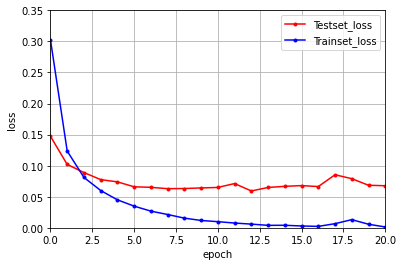

In [0]:
# 테스트 셋 오차
y_vloss = history.history['val_loss']

# 학습셋 오차 (1 - 학습셋정확도)
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.axis([0, 20, 0, 0.35]) # 축 범위 표시
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
